# Amazon Global Superstore - Data Analysis Report
This analysis explores sales performance, profit distribution, customer behavior, and regional performance using Amazon's Global Superstore data (2012–2016). The goal is to extract actionable insights to improve profitability and strategic planning.


In [41]:
"""Import necessary libraries and load credentials from .env"""
import pandas as pd
import os
from sqlalchemy import create_engine
import mysql.connector
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Visualization settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Database Connection & Data Loading

In [40]:
load_dotenv()

"""Retrieve database credentials from environment or fallback to defaults"""
username = os.getenv('DB_USER', 'root')
password = os.getenv('DB_PASS', '1234')
host = os.getenv('DB_HOST', 'localhost')
port = os.getenv('DB_PORT', '3306')
database = os.getenv('DB_NAME', 'amazon')


"""Establish a connection to the MySQL database"""
try:    
    engine = create_engine(f"mysql+mysqlconnector://{username}:{password}@{host}:{port}/{database}")
    conn = engine.connect()
    print("Successfully connected to the database.")
except Exception as e:
    print("Failed to connect to the database:", e)
    

"""Query the database to list all available tables"""
pd.read_sql("show tables",conn)

# Load the entire 'amazon_global_superstore_2016' table into a DataFrame
amazon = pd.read_sql("""select * from amazon_global_superstore_2016 """,conn)

Successfully connected to the database.


# Data Cleaning 

In [3]:
amazon.shape

(51290, 24)

In [5]:
# Check data types of all columns to understand the structure
amazon.dtypes

Row ID                     int64
Order ID                  object
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
Postal Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product ID                object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [6]:
# Check for missing values in each column
amazon.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
Postal Code       41296
City                  0
State                 0
Country               0
Region                0
Market                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
# Drop the 'Postal Code' column as it's likely not needed for analysis and it contains huge null values
amazon.drop(columns=["Postal Code"], inplace = True)

# Features

In [8]:
# Create a new column that calculates the number of days between order and delivery
# This helps analyze delivery performance

amazon["ord_to_deli"] = (amazon["Ship Date"] - amazon["Order Date"]).dt.days

# Extract the year from the 'Ship Date' column to analyze trends over time
amazon["year"] =  (amazon["Ship Date"]).dt.year

In [9]:
amazon.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Discount,Profit,Shipping Cost,ord_to_deli,year
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2014-05-11 21:26:49.155780608,2014-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.610982,26.478567,3.969370,2013.791772
min,1.00000,2012-01-01 00:00:00,2012-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,1.002000,0.000000,2012.000000
25%,12823.25000,2013-06-19 00:00:00,2013-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,3.000000,2013.000000
50%,25645.50000,2014-07-08 00:00:00,2014-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,4.000000,2014.000000
75%,38467.75000,2015-05-22 00:00:00,2015-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,5.000000,2015.000000
max,51290.00000,2015-12-31 00:00:00,2016-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,7.000000,2016.000000
std,14806.29199,NaN,NaN,487.565361,2.278766,0.212280,174.340972,57.251373,1.729437,1.106419


**Key Takeaways**
- Large variation in sales and profit indicates a need to segment products/customers for better pricing or promotion.

- Some transactions are heavily discounted (up to 85%), which might affect profit margins.

- There are a few orders with very high loss, worth investigating further for patterns (maybe by product, region, or category).

- Delivery time is quite efficient (median = 4 days).

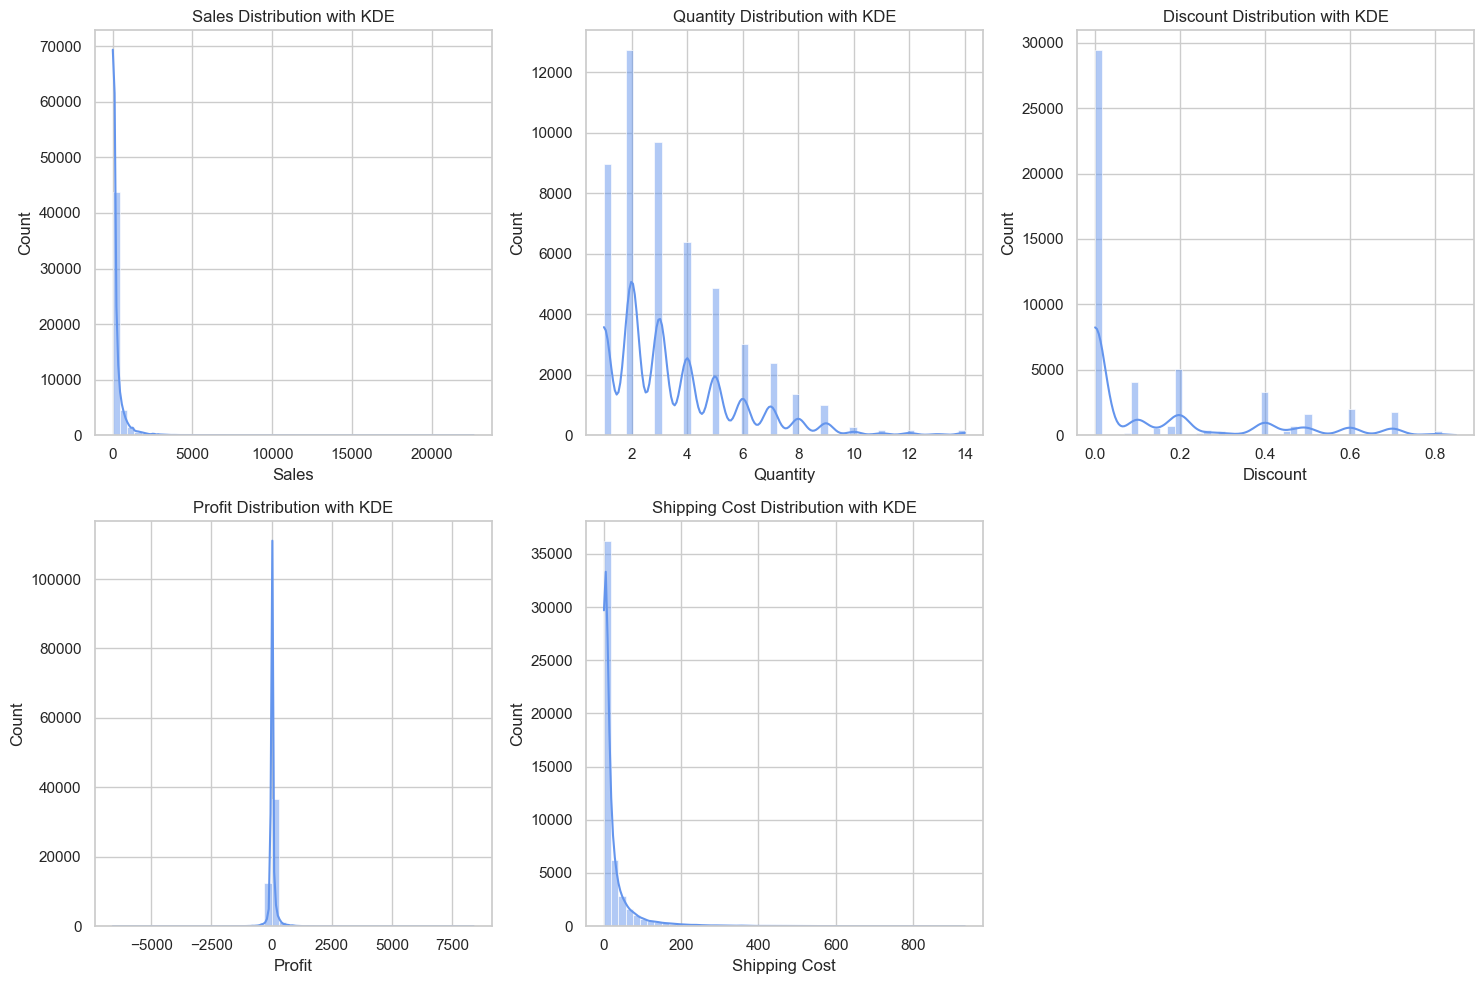

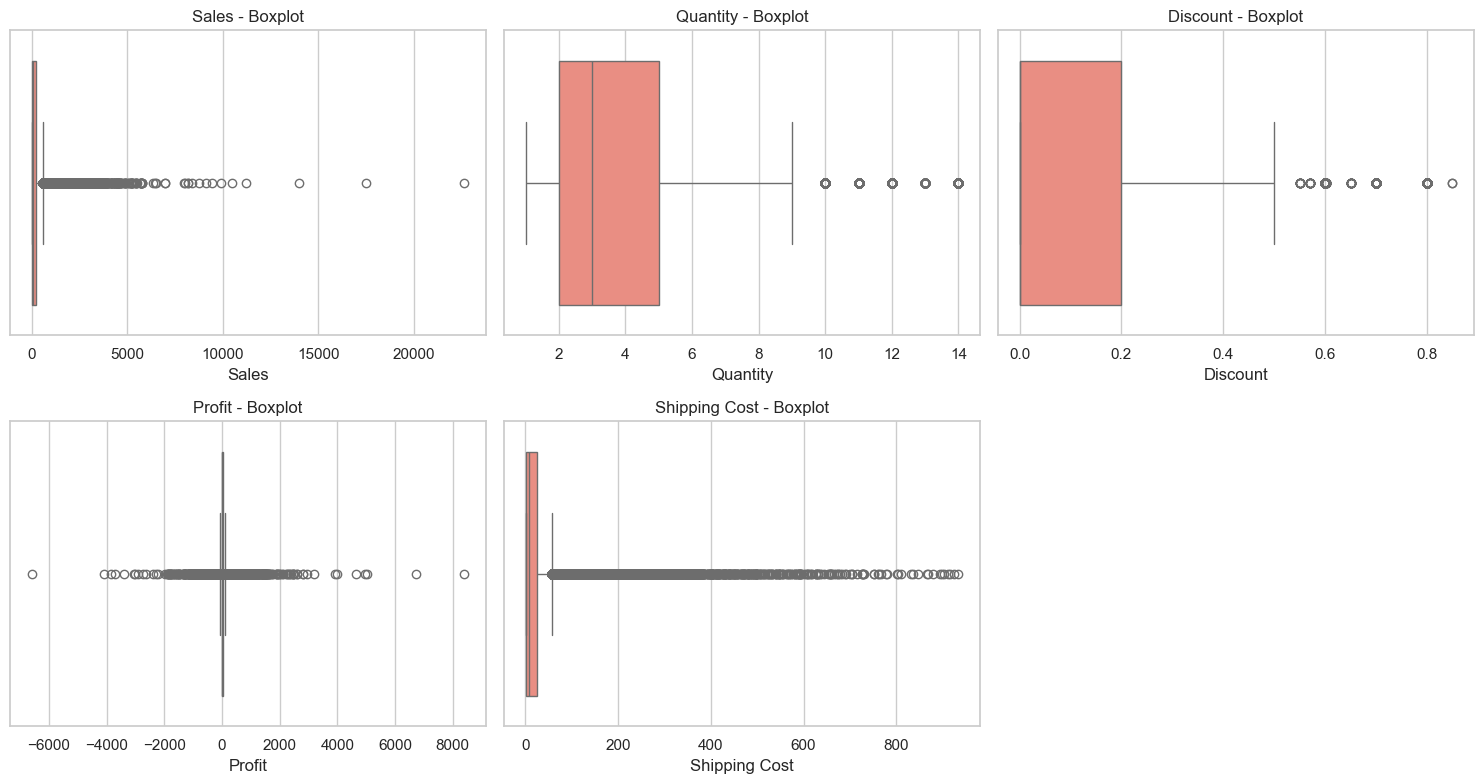

In [12]:
"""
Visualize the distribution and outliers of key numerical columns in the dataset.

- Generates KDE (Kernel Density Estimate) plots combined with histograms 
  for each numerical column in `num_cols` to observe the data distribution and density.
  
- Generates boxplots for the same columns to identify the presence of outliers 
  and understand the spread and central tendency.

Parameters:
- amazon: DataFrame containing the dataset with numerical columns 'Sales', 'Quantity', 
 'Discount', 'Profit', and 'Shipping Cost'.

Plots:
- KDE + Histogram for each numerical column.
- Boxplot for each numerical column.
"""


num_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']



# KDE plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(amazon[col], bins=50, kde=True, color='cornflowerblue')
    plt.title(f'{col} Distribution with KDE')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=amazon[col], color='salmon')
    plt.title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()


**Key EDA Takeaways (with Outliers)**

- Sales: Sales are right-skewed, most orders have low sales value, while a few high-value transactions appear as outliers.

- Quantity: Mostly 1-5 units; few bulk orders are outliers.

- Discounts are mostly in the 0–20% range; discounts above 50% are rare and treated as outliers.

   -Because based on IQR, upper limit was 0.5 (i.e., 50%) — anything above that is statistically an outlier.

- Profit: Many orders with low/negative profit; losses are visible outliers.

- Shipping Cost: Mostly low, but some large shipments cause high-cost outliers.

- Overall: Distributions are skewed; outliers reflect real business scenarios (not errors).

In [13]:
"""
Calculate and print the Interquartile Range (IQR) and outlier thresholds for 
selected numerical columns.

For each column in the DataFrame subset:
- Computes Q1 (25th percentile) and Q3 (75th percentile).
- Calculates the IQR as Q3 - Q1.
- Determines the lower and upper limits for outliers using 1.5 * IQR rule.
- Counts and prints the number of values outside these limits (potential outliers).

Note:
- This code only identifies and prints outlier information; it does not remove any outliers.
- Used for learning and understanding outlier detection with the IQR method.
"""


num_cols = amazon[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']]

for col in num_cols:
    q1 = num_cols[col].quantile(0.25)
    q3 = num_cols[col].quantile(0.75)
    IQR = q3 - q1
    
    lower_limit = q1 - 1.5 * IQR
    upper_limit = q3 + 1.5 * IQR

    print(f"\nOutlier info for '{col}':")
    print("-" * 55, col)
    print(f"Q1: {q1}, | Q3: {q3}")
    print(f"Lower Limit: {lower_limit}, | Upper Limit: {upper_limit}")

    outlier_count = num_cols[(num_cols[col] < lower_limit) | (num_cols[col] > upper_limit)].shape[0]
    print(f"Outliers found: {outlier_count}")


Outlier info for 'Sales':
------------------------------------------------------- Sales
Q1: 30.758625000000002, | Q3: 251.0532
Lower Limit: -299.6832375, | Upper Limit: 581.4950625
Outliers found: 5655

Outlier info for 'Quantity':
------------------------------------------------------- Quantity
Q1: 2.0, | Q3: 5.0
Lower Limit: -2.5, | Upper Limit: 9.5
Outliers found: 877

Outlier info for 'Discount':
------------------------------------------------------- Discount
Q1: 0.0, | Q3: 0.2
Lower Limit: -0.30000000000000004, | Upper Limit: 0.5
Outliers found: 4172

Outlier info for 'Profit':
------------------------------------------------------- Profit
Q1: 0.0, | Q3: 36.81
Lower Limit: -55.215, | Upper Limit: 92.025
Outliers found: 9755

Outlier info for 'Shipping Cost':
------------------------------------------------------- Shipping Cost
Q1: 2.61, | Q3: 24.45
Lower Limit: -30.15, | Upper Limit: 57.209999999999994
Outliers found: 5909


# Business KPIs

In [14]:
#total sales
total_sales = round(amazon["Sales"].sum(),2)

#total quantity 
total_quantity=amazon["Quantity"].sum()

# ord to deli days
ord_to_deli = round(amazon["ord_to_deli"].median(),2)

#average ord value
aov = round(amazon["Sales"].sum() / amazon["Customer ID"].nunique(),2)

# Create profit margin
amazon['profit_margin'] = amazon['Profit'] / amazon['Sales']

print(f"Total sales:{total_sales}")
print(f"Total Quantity:{total_quantity}")
print(f"ord to del days:{ord_to_deli}")

Total sales:12642501.91
Total Quantity:178312
ord to del days:4.0


In [15]:
# Print count of unique values in selected categorical columns
for col in ['Segment', 'Category', 'Country']:
    print(f"{col}: {amazon[col].nunique()} unique values")

Segment: 3 unique values
Category: 3 unique values
Country: 165 unique values


# correlation between variables 


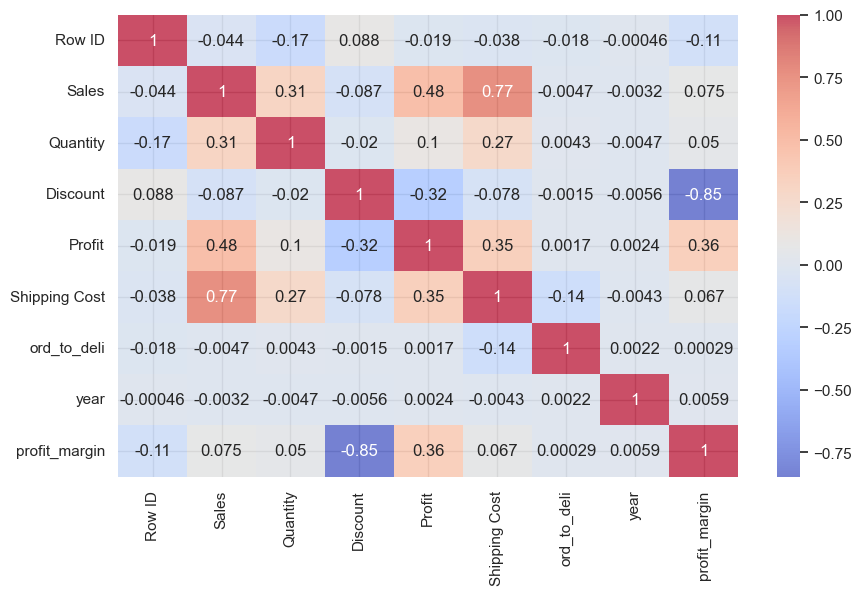

In [16]:
# correlation between variables 
amazon.corr(numeric_only=True)
sns.heatmap(amazon.corr(numeric_only=True), annot=True, cmap='coolwarm', alpha=0.7)
plt.show()

**Sales and Shipping Cost (Corr: 0.77)**

- There is a strong positive correlation between Sales and Shipping Cost.

  This suggests that higher-value sales often involve higher shipping expenses, likely due to larger or heavier orders.

**Discount and Profit Margin (Corr: -0.85)**

- A very strong negative correlation is observed between Discount and Profit Margin.

This means that offering higher discounts significantly reduces the profit margin, which may impact business profitability.

**Sales and Profit (Corr: 0.48)**

- There is a moderate positive relationship between Sales and Profit.
 While increased sales generally lead to higher profit, the relationship is not perfectly linear-indicating that other factors (like discounts and    shipping costs) also influence profit.

**Discount and Profit (Corr: -0.32)**

- Discounts also negatively affect overall Profit, though not as strongly as they do the profit margin.

 This highlights the need to strike a balance between attracting customers and maintaining profitability.

**Quantity and Sales (Corr: 0.31)**

- More quantity sold usually leads to more sales, as expected.
  
  However, since the correlation is not very strong, it could mean some high-value products sell in low quantity but still generate high revenue.

**Recommendation**
- The business should closely monitor discounting strategies. While discounts can boost quantity sold, they significantly reduce profit margins.
- A more targeted discount policy may help optimize both sales volume and profitability.

# Sales by Segment

Segment
Consumer       6507949.42
Corporate      3824697.52
Home Office    2309854.97
Name: Sales, dtype: float64


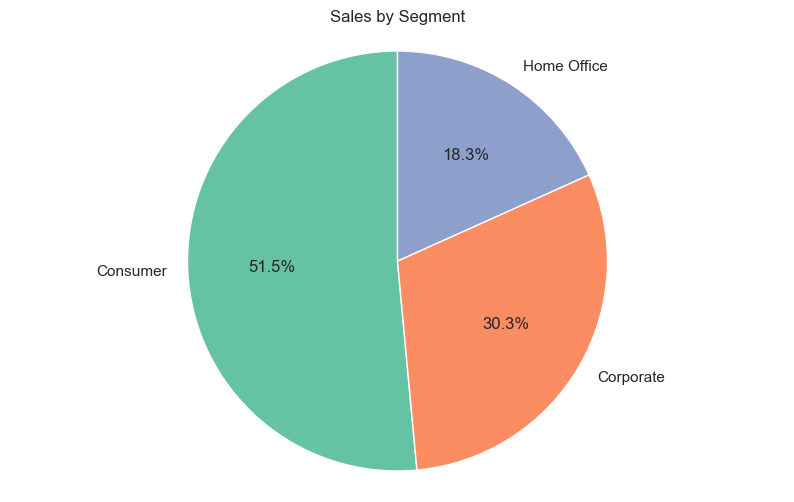

In [42]:
"""
Analyze sales distribution across segments and visualize it.

Steps:
- Count the occurrences of each segment in the dataset.
- Calculate total sales per segment, rounded to 2 decimals, and sort descending.
- Plot a pie chart showing the percentage contribution of each segment to total sales.
- Customize the pie chart with segment labels, percentage display, colors, and a title.
- Ensure the pie chart is a perfect circle by setting equal axis aspect.

Inputs:
- 'amazon' DataFrame with columns 'Segment' and 'Sales'.
"""

amazon['Segment'].value_counts()
segment_sales = round(amazon.groupby('Segment')['Sales'].sum(), 2).sort_values(ascending=False)
print(segment_sales)

# Define colors
colors = sns.color_palette("Set2", n_colors=len(segment_sales))

# Plot Pie Chart
#plt.figure(figsize=(4, 4))
plt.pie(segment_sales, 
        labels=segment_sales.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors)

plt.title("Sales by Segment")
plt.axis('equal')  # Keep it circular
plt.show()

- The Corporate and Consumer segments generate the highest sales among all segments.

# Sales by Market Distribution

Sales Distribution by Market Market
Africa          7.837732e+05
LATAM           2.164605e+06
USCA            2.364129e+06
Europe          3.287336e+06
Asia Pacific    4.042658e+06
Name: Sales, dtype: float64

-------------------------------------------------- Sales Distribution --------------------------------------------------


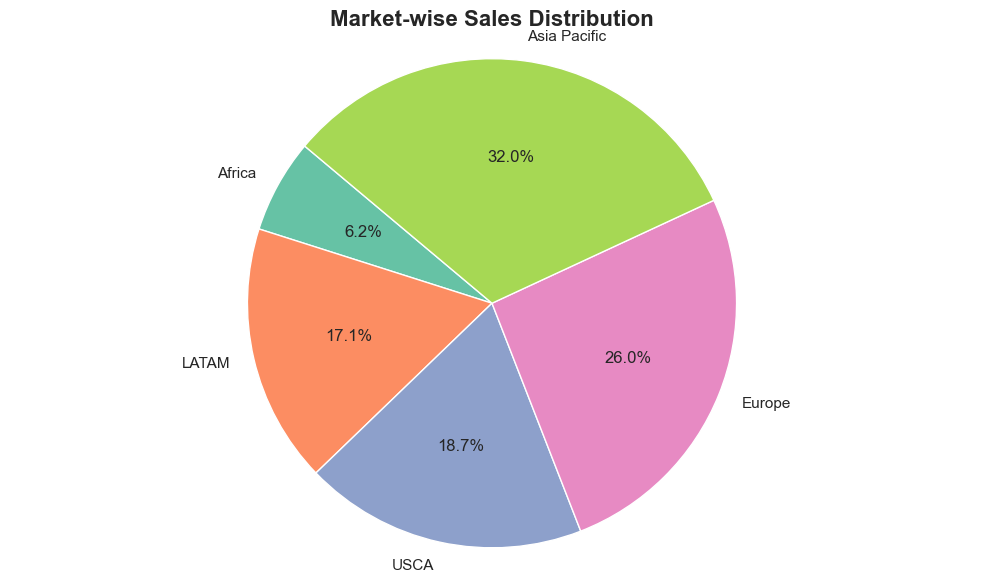

In [43]:
sales_by_market = amazon.groupby("Market")["Sales"].sum().sort_values()
print("Sales Distribution by Market",sales_by_market)
sales_by_market1 = sales_by_market.reset_index()


print()
print('-'*50,f"Sales Distribution",'-'*50)

colors = sns.color_palette("Set2", n_colors=len(sales_by_market))

# Plot the pie chart
#plt.figure(figsize=(4,4))
plt.pie(
    sales_by_market1['Sales'],
    labels=sales_by_market1['Market'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Market-wise Sales Distribution", fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio to ensure perfect circle
plt.tight_layout()
plt.show()

- The African market shows a lower sales distribution compared to Asia Pacific, Europe, USCA, and LATAM regions.
- Asia Pacific has the highest sales distribution, followed by Europe and USCA.
- Africa has the lowest sales contribution, indicating potential room for growth or a less mature market.

# Top 10 Products by Sales

                                        Product Name       Sales
0                       Apple Smart Phone, Full Size  86935.7786
1                       Cisco Smart Phone, Full Size  76441.5306
2                    Motorola Smart Phone, Full Size  73156.3030
3                       Nokia Smart Phone, Full Size  71904.5555
4              Canon imageCLASS 2200 Advanced Copier  61599.8240
5         Hon Executive Leather Armchair, Adjustable  58193.4841
6  Office Star Executive Leather Armchair, Adjust...  50661.6840
7  Harbour Creations Executive Leather Armchair, ...  50121.5160
8                      Samsung Smart Phone, Cordless  48653.4600
9                  Nokia Smart Phone, with Caller ID  47877.7857

-------------------------------------------------- Top 10 Products by Sales --------------------------------------------------


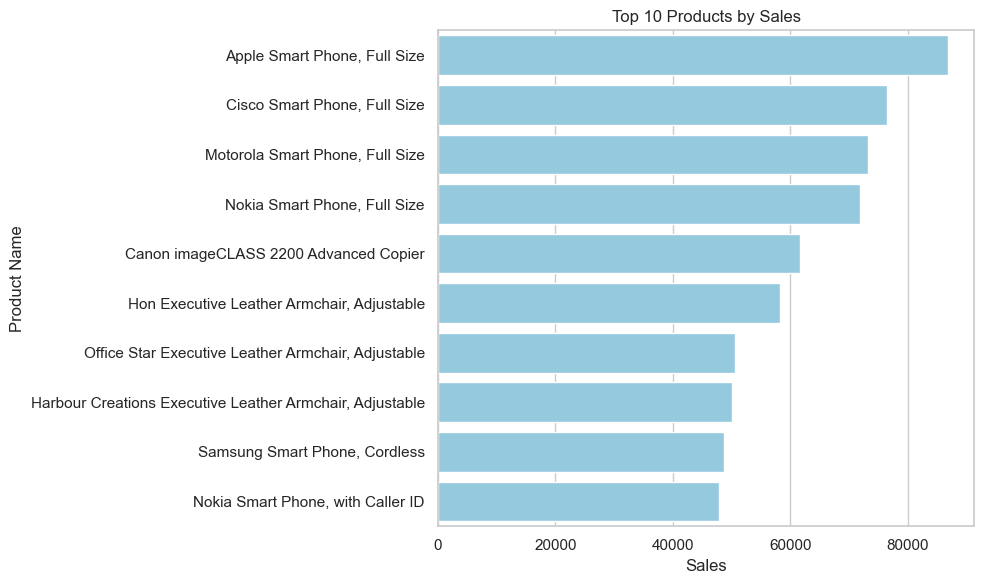

In [20]:

Products_by_Sales = (
    amazon.groupby("Product Name")["Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
print(Products_by_Sales)

print()
print('-'*50,f"Top 10 Products by Sales",'-'*50)

#plt.figure(figsize=(8, 3))
sns.barplot(data=Products_by_Sales, x="Sales", y="Product Name", color ="skyblue")
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

- The top-selling products are dominated by smart phones from brands like Apple, Cisco, Motorola, Nokia, and Samsung.
- Among non-phone items, executive leather armchairs and office copiers also contribute significantly to sales. 
- The Apple Smart Phone leads in sales, followed closely by Cisco and Motorola models. 
- This highlights a strong demand for mobile devices alongside premium office furniture in the product mix.



# Top 10 Products by profit

Top 10 Products by profit: Product Name
Canon imageCLASS 2200 Advanced Copier                       25199.9280
Cisco Smart Phone, Full Size                                17238.5206
Motorola Smart Phone, Full Size                             17027.1130
Hoover Stove, Red                                           11807.9690
Sauder Classic Bookcase, Traditional                        10672.0730
Harbour Creations Executive Leather Armchair, Adjustable    10427.3260
Nokia Smart Phone, Full Size                                 9938.1955
Cisco Smart Phone, with Caller ID                            9786.6408
Nokia Smart Phone, with Caller ID                            9465.3257
Belkin Router, USB                                           8955.0180
Name: Profit, dtype: float64

-------------------------------------------------- Products by Profit --------------------------------------------------


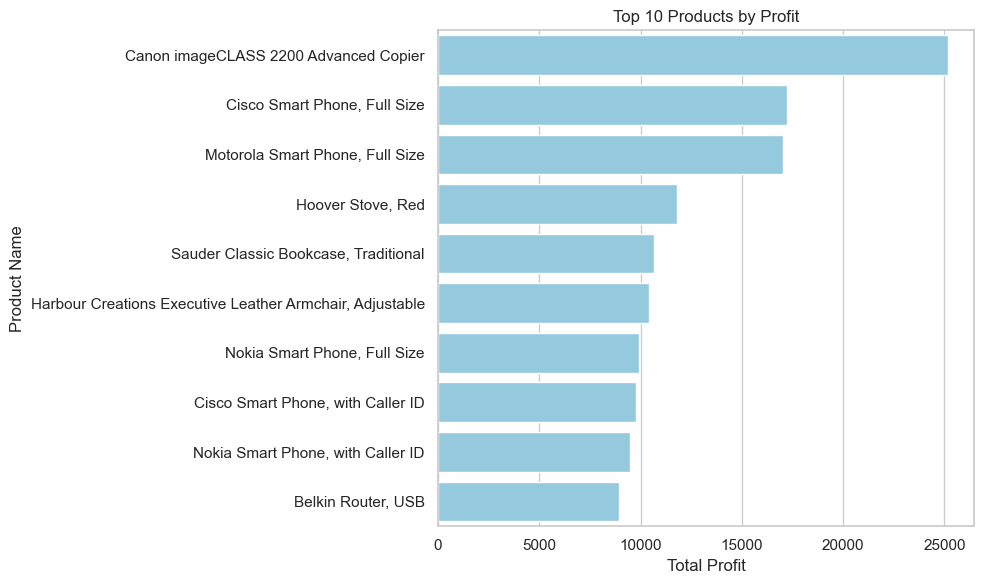

In [21]:
Products_by_Profit = amazon.groupby("Product Name")["Profit"].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by profit:",Products_by_Profit)
Products_by_Profit = Products_by_Profit.reset_index()

print()
print('-'*50,f"Products by Profit",'-'*50)


# plt.figure(figsize=(8, 3))
sns.barplot(
    data=Products_by_Profit,
    x='Profit',
    y='Product Name',
    color = "skyblue"
)
plt.title("Top 10 Products by Profit")
plt.xlabel("Total Profit")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

 Top 10 Products by Profit Summary:
- High-margin products are led by Canon imageCLASS 2200 Advanced Copier, generating the highest profit overall. 
  Smart phones from Cisco, Motorola, and Nokia also feature prominently, indicating strong profitability in the mobile category.
  
- Additionally, office furniture like Harbour Creations Armchairs and electronics like the Belkin USB Router contribute notable profit, suggesting that both tech and premium office equipment are key drivers of profitability.

# Top 10 Loss Making Products

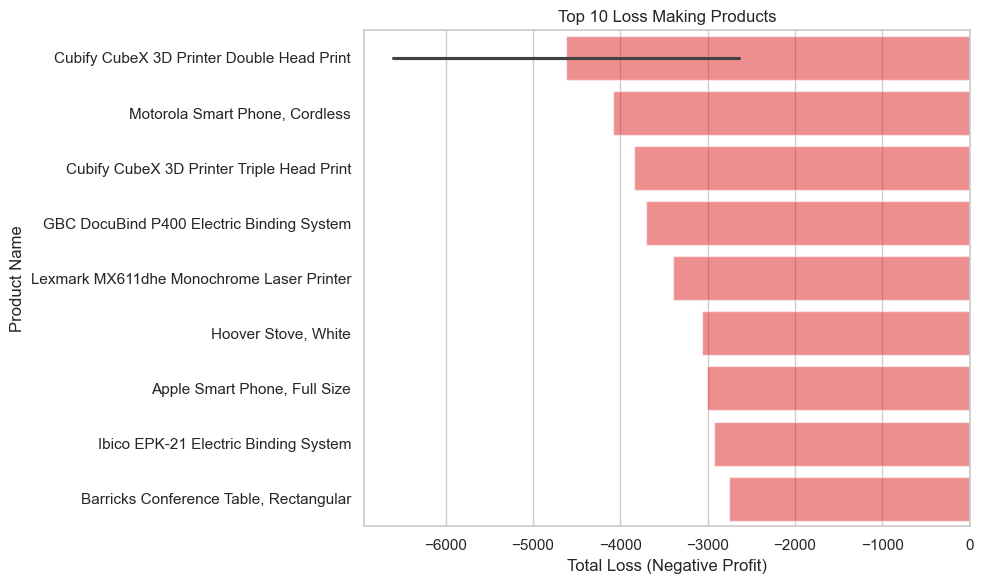

In [22]:
# products with loss (negative profit)
loss_products = amazon[amazon['Profit'] < 0]

# Sort them by most loss-making
top_10_loss = loss_products.sort_values(by='Profit').head(10)

# Display result
top_10_loss[['Product Name', 'Profit', 'Sales', 'Quantity']]



#plt.figure(figsize=(8, 4))
sns.barplot(data=top_10_loss, x='Profit', y='Product Name', color = "red",alpha=0.5)
plt.title('Top 10 Loss Making Products')
plt.xlabel('Total Loss (Negative Profit)')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

Top 10 products are generating the highest losses despite sales.
This indicates either:
- High discounting
- High shipping costs
- Or wrong pricing strategy

Action: These products need review to improve profitability.


# Top 10 Most Profitable Customers

Top 10 Most Profitable Customers
Customer Name
Tamara Chand       8672.89890
Raymond Buch       8453.04950
Sanjit Chand       8205.37990
Hunter Lopez       7816.56778
Bill Eplett        7410.00530
Harry Marie        6958.28640
Susan Pistek       6484.40726
Mike Gockenbach    6458.67620
Adrian Barton      6417.28450
Tom Ashbrook       6311.97910
Name: Profit, dtype: float64

-------------------------------------------------- Profitable Customers --------------------------------------------------


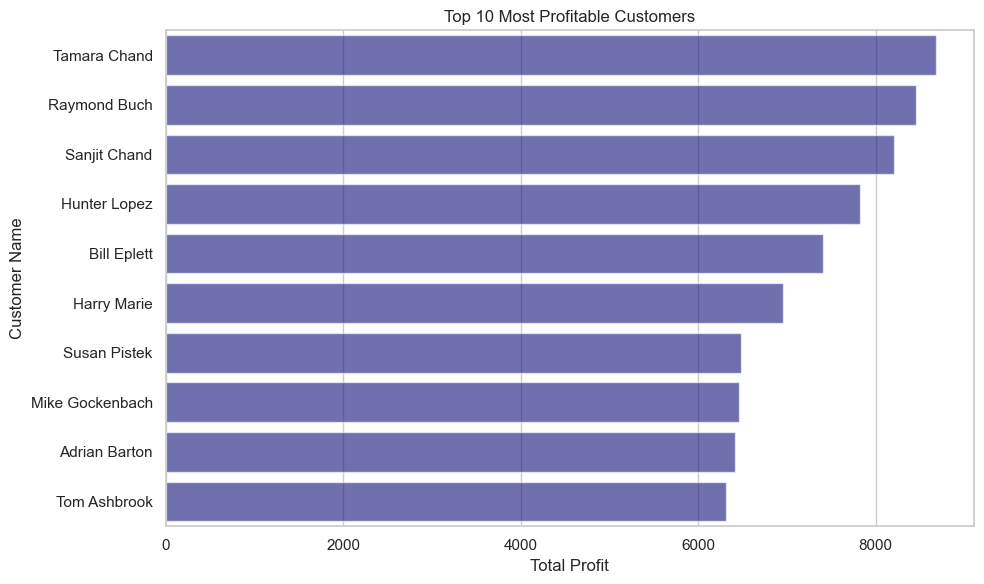

In [24]:
# Calculate top 10 most profitable customers
Most_Profitable_Customers = amazon.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False).head(10)

# Print the result
print("Top 10 Most Profitable Customers")
print(Most_Profitable_Customers)

print()
print('-'*50, "Profitable Customers", '-'*50)

# Convert Series to DataFrame for plotting
top_10_customers_df = Most_Profitable_Customers.reset_index()

# Plot
#plt.figure(figsize=(8, 4))
sns.barplot(
    data=top_10_customers_df,
    x="Profit",
    y="Customer Name",
    color="darkblue",
    alpha=0.6
)
plt.title("Top 10 Most Profitable Customers")
plt.xlabel("Total Profit")
plt.ylabel("Customer Name")
plt.tight_layout()
plt.show()


Top 10 Most Profitable Customers Summary:
- The most profitable customer is Tamara Chand, generating over 8,600 in profit, followed closely by Raymond Buch and Sanjit Chand, each contributing more than 8,000. 
- This group of top 10 customers shows significant individual profitability, suggesting strong repeat business or high-value purchases. 
- These customers are likely key accounts that could benefit from focused relationship management and retention strategies.

# Loss-Making Sub-Categories 

In [25]:
# Group-wise Loss Analysis
amazon[amazon['Profit'] < 0].groupby('Sub-Category')['Profit'].sum().sort_values().head(10)

Sub-Category
Tables        -144123.14860
Bookcases     -101446.29730
Phones         -96417.66010
Chairs         -96084.89690
Machines       -78672.74030
Storage        -76063.97800
Copiers        -71547.49982
Appliances     -63985.34630
Binders        -52884.06130
Accessories    -39857.49820
Name: Profit, dtype: float64

Top 10 Loss-Making Sub-Categories Summary:
- The Tables sub-category incurs the highest losses, with a total profit deficit of over -144,000, followed by Bookcases, Phones, and Chairs all showing significant negative profit. 
- Office equipment such as Machines, Copiers, and Appliances also appear prominently in the loss-making list. 
- These insights suggest potential issues such as high discounts, low margins, or high return rates in these categories, warranting further investigation to improve profitability.

# Loss-Making Countries

Loss-Making Countries: Country
United States   -156131.28570
Turkey           -98447.23200
Nigeria          -80750.71800
Brazil           -42073.08364
Netherlands      -41470.40700
Australia        -40907.75100
Indonesia        -34510.12310
France           -33875.89050
Italy            -33698.97600
Honduras         -30538.17608
Name: Profit, dtype: float64

-------------------------------------------------- Loss-Making Countries --------------------------------------------------


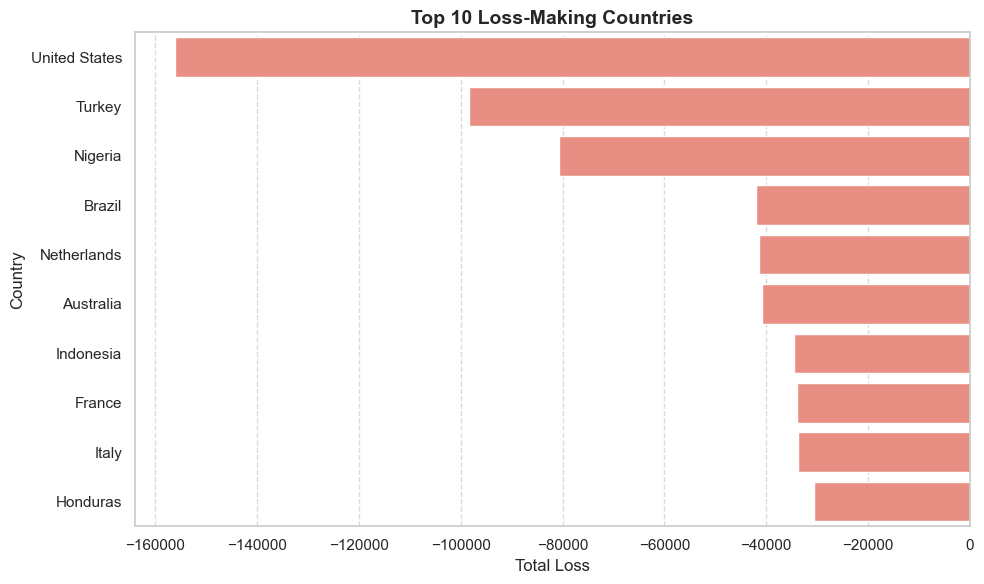

In [26]:
top_loss_countries=amazon[amazon['Profit'] < 0].groupby('Country')['Profit'].sum().sort_values().head(10)
top_loss_countries1 = top_loss_countries.reset_index()
print("Loss-Making Countries:",top_loss_countries)

print()
print('-'*50,f"Loss-Making Countries",'-'*50)

# plt.figure(figsize=(6, 4))
sns.barplot(data=top_loss_countries1, x='Profit', y='Country', color='salmon')
plt.title('Top 10 Loss-Making Countries', fontsize=14, fontweight='bold')
plt.xlabel('Total Loss', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Top 10 Loss-Making Countries – Summary:

- The United States tops the list of loss-making countries with over 156,000 in negative profit, followed by Turkey and Nigeria, each incurring losses above 80,000.
- Other countries with significant losses include Brazil, Netherlands, and Australia. 
- The presence of both developed and developing nations in this list suggests that losses may not be limited to geography but could be influenced by pricing strategies, high discounts, operational costs, or product mix.

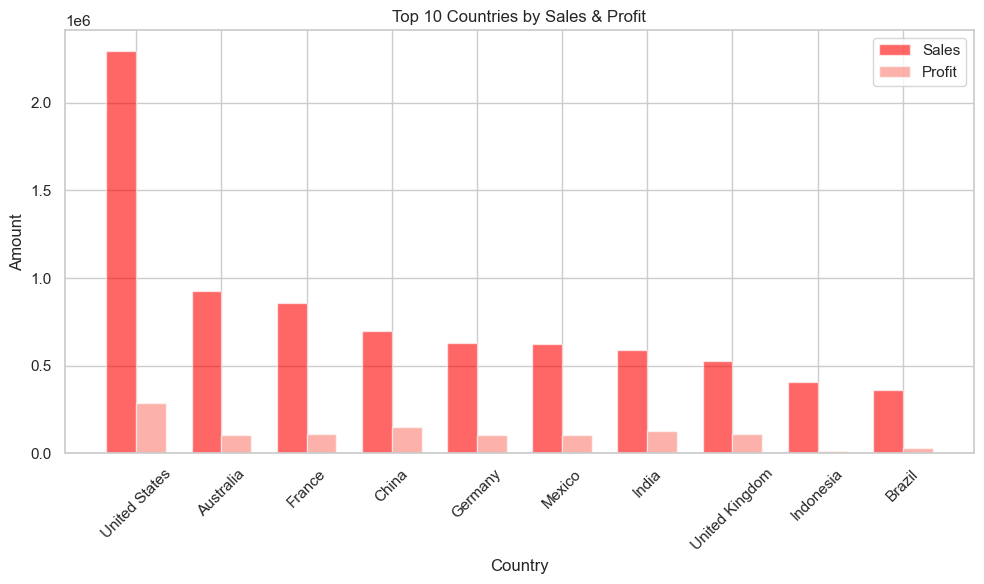

In [28]:
# Group and summarize
summary = amazon.groupby("Country")[["Sales", "Profit"]].sum()

# Get top 10 countries by Sales
summary = summary.sort_values("Sales", ascending=False).head(10)

# Create bar positions
x = np.arange(len(summary))
width = 0.35  # Width of each bar

# Plot
#plt.figure(figsize=(8, 5))
plt.bar(x - width/2, summary["Sales"], width=width, label="Sales", color="red", alpha = 0.6)
plt.bar(x + width/2, summary["Profit"], width=width, label="Profit", color="salmon", alpha = 0.6)


# : Formatting
plt.xticks(x, summary.index, rotation=45)
plt.title("Top 10 Countries by Sales & Profit")
plt.xlabel("Country")
plt.ylabel("Amount")
plt.legend()
plt.tight_layout()
plt.show()

# sub category wise analysis 

In [29]:
profit_by_Sub_Category = amazon.groupby("Sub-Category")["Profit"].sum().sort_values()
Sales_by_Sub_Category = amazon.groupby("Sub-Category")["Sales"].sum().sort_values()

print("Profit by sub category:",profit_by_Sub_Category)


Profit by sub category: Sub-Category
Tables         -64083.38870
Fasteners       13844.28890
Labels          14988.92370
Supplies        22559.19530
Envelopes       28849.48730
Furnishings     46845.43190
Art             57829.85930
Paper           58111.65350
Machines        58867.87300
Binders         72433.15160
Storage        108416.68060
Accessories    129626.30620
Chairs         140396.26750
Appliances     141562.58770
Bookcases      161924.41950
Phones         216717.00580
Copiers        258567.54818
Name: Profit, dtype: float64


In [30]:
print("sales by sub category:",Sales_by_Sub_Category)

sales by sub category: Sub-Category
Labels         7.335028e+04
Fasteners      8.949505e+04
Envelopes      1.692175e+05
Paper          2.417875e+05
Supplies       2.428111e+05
Art            3.716132e+05
Furnishings    3.851560e+05
Binders        4.618694e+05
Accessories    7.492370e+05
Tables         7.570419e+05
Machines       7.790601e+05
Appliances     1.010536e+06
Storage        1.126813e+06
Bookcases      1.466572e+06
Chairs         1.501682e+06
Copiers        1.509436e+06
Phones         1.706824e+06
Name: Sales, dtype: float64


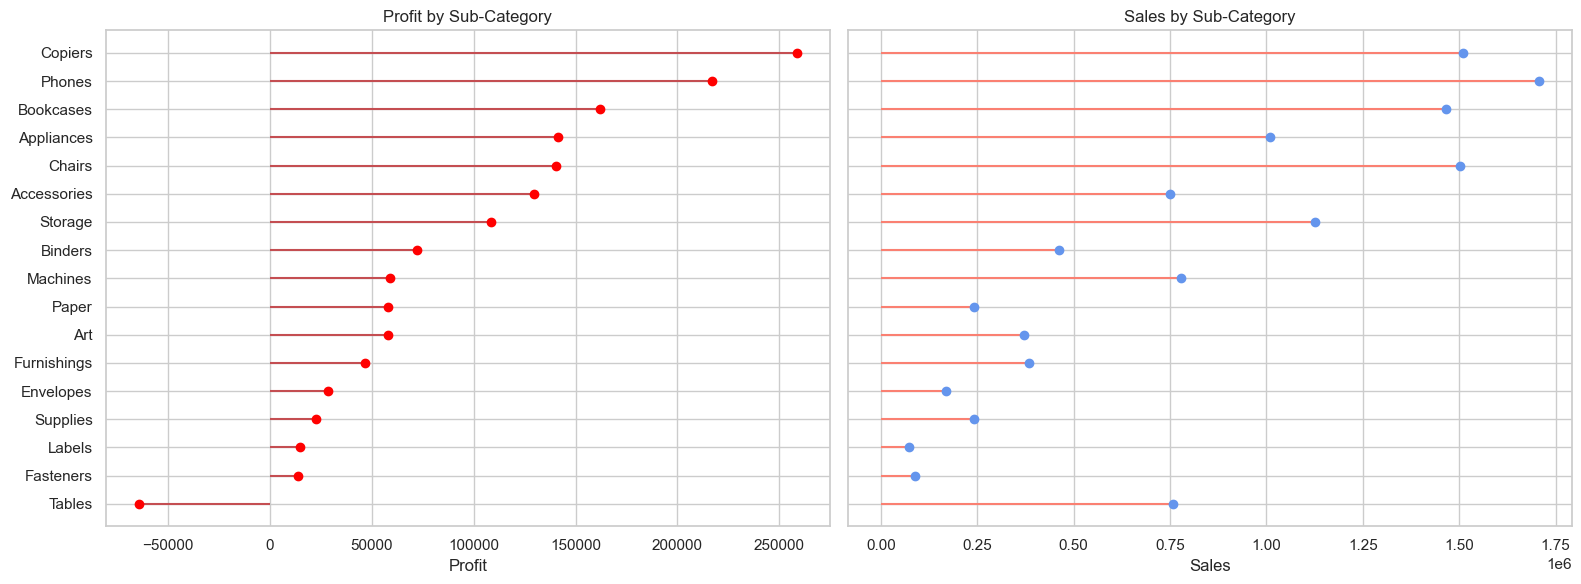

In [31]:
profits = profit_by_Sub_Category.sort_values()
sales = Sales_by_Sub_Category

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)


# Profit lollipop plot
axes[0].hlines(y=profits.index, xmin=0, xmax=profits.values, color='r')
axes[0].plot(profits.values, profits.index, "o", color='red')
axes[0].set_title('Profit by Sub-Category')
axes[0].set_xlabel('Profit')

# Sales lollipop plot
axes[1].hlines(y=sales.index, xmin=0, xmax=sales.values, color='salmon')
axes[1].plot(sales.values, sales.index, "o", color='cornflowerblue')
axes[1].set_title('Sales by Sub-Category')
axes[1].set_xlabel('Sales')

plt.tight_layout()
plt.show()

- Phones and Copiers lead both in sales and profit, showing strong performance.
- Chairs, Appliances, and Bookcases also generate high profits with solid sales.
- Tables have high sales but negative profit, indicating possible margin issues.
- Smaller categories like Fasteners and Labels have low sales and low profits.

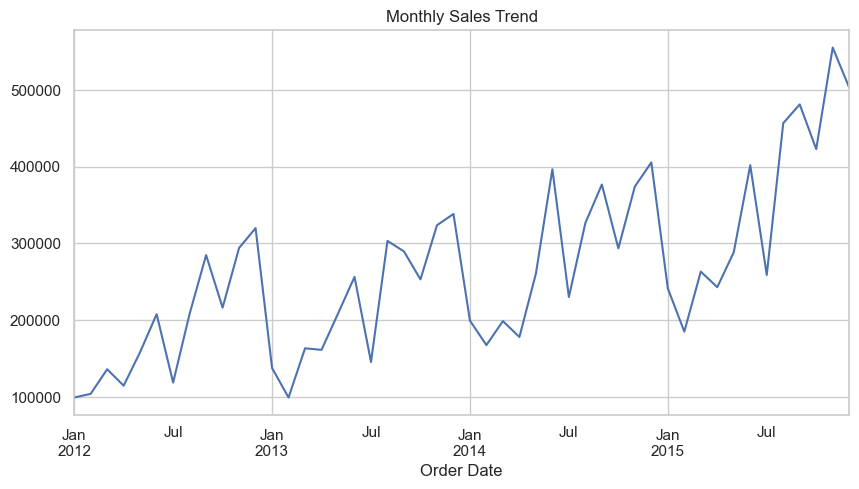

In [32]:
# Monthly Sales Calculation (Time Series Trend)

"""
Generates a monthly sales time series plot.

- Sets 'Order Date' as the index of the DataFrame.
- Resamples the sales data by month-end ('ME') to calculate total sales per month.
- Plots the resulting time series to visualize monthly sales trends over time.
"""

monthly_sales = amazon.set_index('Order Date').resample('ME')['Sales'].sum()

monthly_sales.plot(figsize=(10, 5), title='Monthly Sales Trend')
plt.show()

# Additional Insightful Visualizations

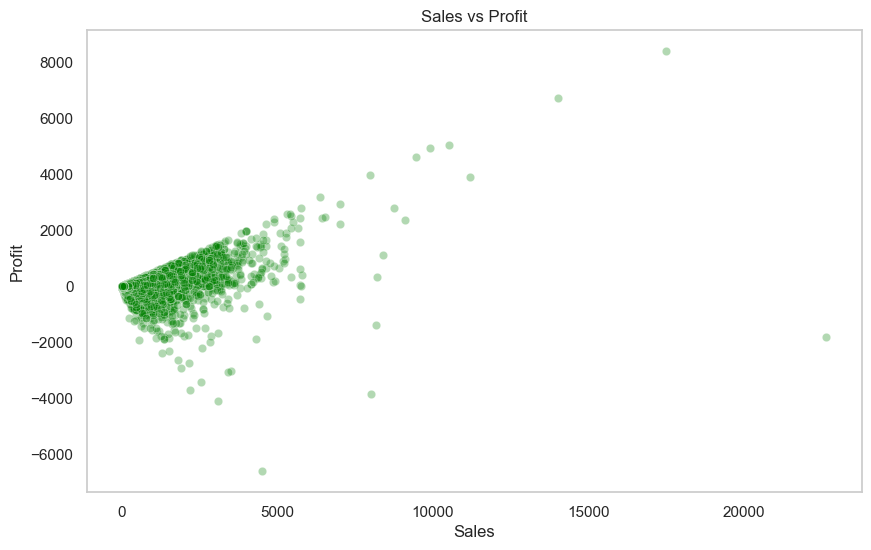

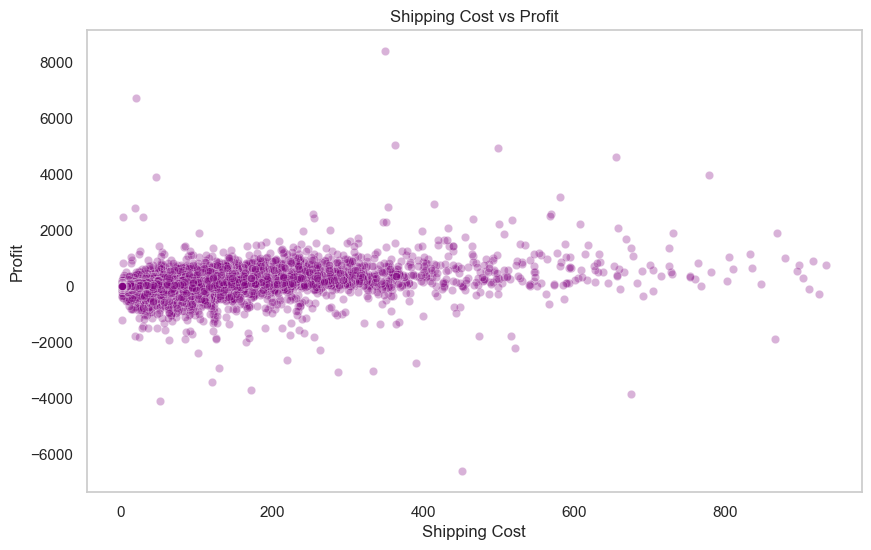

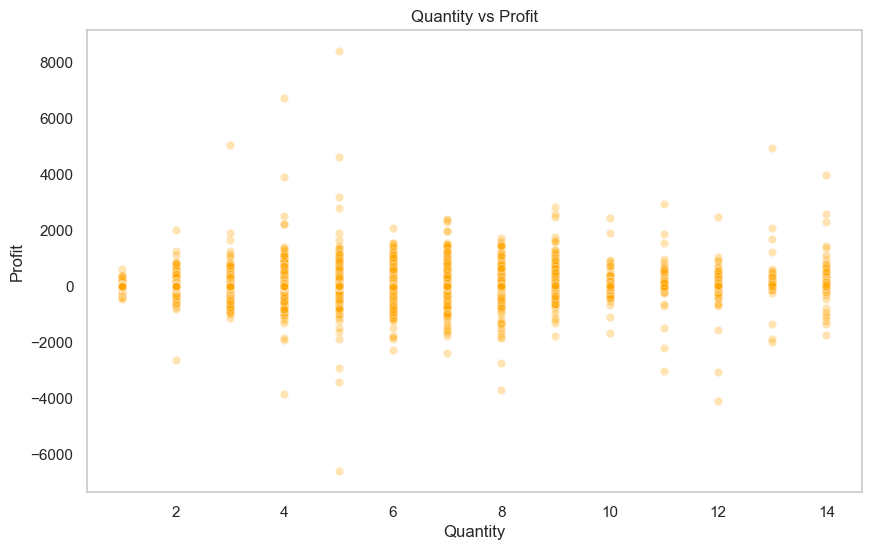

In [33]:
# Sales vs Profit
sns.scatterplot(data=amazon, x='Sales', y='Profit', alpha=0.3, color='green')
plt.title('Sales vs Profit')
plt.grid()
plt.show()

# Shipping Cost vs Profit
sns.scatterplot(data=amazon, x='Shipping Cost', y='Profit', alpha=0.3, color='purple')
plt.title('Shipping Cost vs Profit')
plt.grid()
plt.show()

# Quantity vs Profit
sns.scatterplot(data=amazon, x='Quantity', y='Profit', alpha=0.3, color='orange')
plt.title('Quantity vs Profit')
plt.grid()
plt.show()


**Sales vs Profit**

- Positive trend: Higher sales generally lead to higher profit.

- Some low-sales orders result in heavy losses, possibly due to discounts or returns.

- Opportunity: Focus on optimizing low-sales orders to reduce profit leakage.

**Shipping Cost vs Profit**

- No strong correlation: High shipping costs don't guarantee higher profit.

- Many high shipping cost orders are still unprofitable.

- Opportunity: Review shipping vendors or pricing to improve cost-efficiency.

**Quantity vs Profit**

- No clear pattern: Selling more units doesn't always increase profit.

- Losses occur even in high-quantity orders - possibly due to bulk discounts or logistics issues.

- Opportunity: Evaluate pricing and margin strategy for bulk orders.

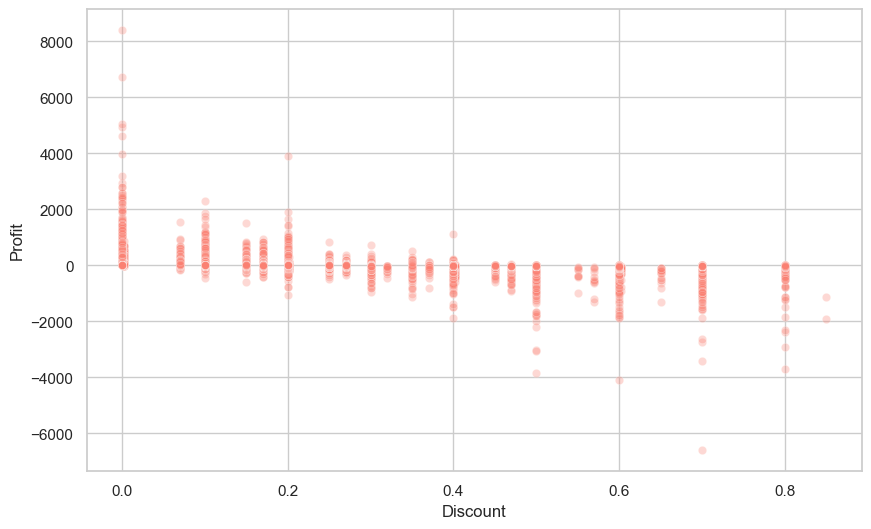

In [34]:
"""
Creates a scatter plot to visualize how profit varies with discount levels.
Each point represents an individual order.
This helps identify patterns such as profit drops at high discounts.
"""
sns.scatterplot(data=amazon, x='Discount', y='Profit', color = "salmon", alpha=0.3)
plt.show()

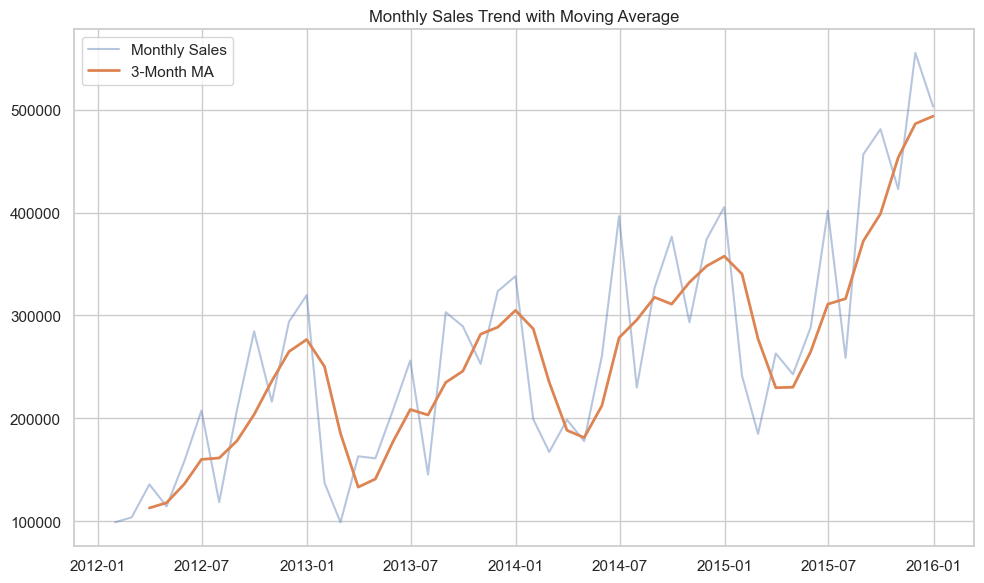

In [35]:
monthly_sales = amazon.set_index('Order Date').resample('ME')['Sales'].sum()
monthly_ma = monthly_sales.rolling(window=3).mean()

plt.plot(monthly_sales, label='Monthly Sales', alpha=0.4)
plt.plot(monthly_ma, label='3-Month MA', linewidth=2)
plt.title("Monthly Sales Trend with Moving Average")
plt.legend()
plt.tight_layout()
plt.show()

**Takeaways:**
- The business is growing consistently, but monthly sales are volatile, likely due to seasonal demand.

- The moving average helps in forecasting and making strategic decisions based on longer-term trends.

- This insight is valuable for inventory planning, marketing, and budget allocation.



In [36]:
"""Close the database connection to avoid leaks"""
conn.close()
print("Connection closed.")

Connection closed.


# ________________________________________________________________________________________________

# Executive Summary: Key Exploratory Insights

**Sales & Profit Patterns**

- Sales distribution is right-skewed, dominated by low-value transactions, with a few large-ticket items.

- Outliers observed in both Sales and Profit - especially among high-value products.

- Significant negative correlation between discounts and profit (r = -0.85), suggesting deep discounts hurt margins.

**Top Performers**

- Top Market: USCA (United States & Canada) - contributes over 30% of total sales.

- Top Segment: Consumer segment leads with over ₹6.5M in sales (~51% share).

- Top Profit-Making Products: Canon ImageCLASS, Cisco & Motorola devices.

- Top Loss-Making Products: Cubify Cube, Lexmark MX series - major loss contributors.

- High-Value Customers: Tamara Chand and Ray Buch - top repeat buyers driving profitability.

**Operational Insights**

- Shipping Cost vs Profit: No direct relationship - high shipping cost doesn’t ensure higher profit.

- Quantity vs Profit: No consistent trend - even large quantity orders can result in losses, possibly due to pricing inefficiencies.

- Low-Sales Orders often result in negative profit, indicating potential issues with discounting or fulfillment costs.

**Trend Analysis**

- Monthly Sales Trend shows consistent year-over-year growth, with clear seasonal spikes.

- A 3-month moving average highlights stable long-term growth, useful for forecasting and planning.

**Recommendations**

- Optimize low-sales, high-loss orders to reduce profit leakage.

- Reevaluate bulk pricing strategies and shipping policies for efficiency.

- Leverage top-performing segments, products, and customers to drive sustained growth.

- Use trend analysis for inventory planning, campaign timing, and budget allocation.

